In [103]:
import pandas as pd 
import tweepy 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import warnings 

In [4]:
# function to display data of each tweet 
def printtweetdata(n, ith_tweet): 
    print() 
    print(f"Tweet {n}:") 
    print(f"Username:{ith_tweet[0]}") 
    print(f"Description:{ith_tweet[1]}") 
    print(f"Location:{ith_tweet[2]}") 
    print(f"Following Count:{ith_tweet[3]}") 
    print(f"Follower Count:{ith_tweet[4]}") 
    print(f"Total Tweets:{ith_tweet[5]}") 
    print(f"Retweet Count:{ith_tweet[6]}") 
    print(f"Tweet Text:{ith_tweet[7]}") 
    print(f"Hashtags Used:{ith_tweet[8]}") 
  
  
# function to perform data extraction 
def scrape(words, date_since, numtweet): 
      
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags']) 
      
    # We are using .Cursor() to search through twitter for the required tweets. 
    # The number of tweets can be restricted using .items(number of tweets) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en", 
                           since=date_since, tweet_mode='extended').items(numtweet) 
     
    # .Cursor() returns an iterable object. Each item in  
    # the iterator has various attributes that you can access to  
    # get information about each tweet 
    list_tweets = [tweet for tweet in tweets] 
      
    # Counter to maintain Tweet Count 
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet 
    for tweet in list_tweets: 
        username = tweet.user.screen_name 
        description = tweet.user.description 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        retweetcount = tweet.retweet_count 
        hashtags = tweet.entities['hashtags'] 
          
        # Retweets can be distinguished by a retweeted_status attribute, 
        # in case it is an invalid reference, except block will be executed 
        try: 
            text = tweet.retweeted_status.full_text 
        except AttributeError: 
            text = tweet.full_text 
        hashtext = list() 
        for j in range(0, len(hashtags)): 
            hashtext.append(hashtags[j]['text']) 
          
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [username, description, location, following, 
                     followers, totaltweets, retweetcount, text, hashtext] 
        db.loc[len(db)] = ith_tweet 
          
        # Function call to print tweet data on screen 
        printtweetdata(i, ith_tweet) 
        i = i+1
    filename = 'scraped_tweets.csv'
      
    # we will save our database as a CSV file. 
    db.to_csv(filename) 
  
  
if __name__ == '__main__': 
      
    # Enter your own credentials obtained  
    # from your developer account 
    consumer_key = "ry9GMoJRUCdsHo89bkpVosu8T"
    consumer_secret = "y9Yy5X6RE3n6hEogGhVYCmGDKgDPhWuQB8sexc61xKH01Xv6MA"
    access_key = "1330861473481052162-NXO8xkGNxf0g6A7wbOjOfMPKZrfUvT"
    access_secret = "20Ye373RjvjjMfpbPHAW6kbwJURRbqRaQsnMYFBCrZpyw"
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    auth.set_access_token(access_key, access_secret) 
    api = tweepy.API(auth,wait_on_rate_limit=True) 
      
    # Enter Hashtag and initial date 
    print("Enter Twitter HashTag to search for") 
    words = input() 
    print("Enter Date since The Tweets are required in yyyy-mm--dd") 
    date_since = input() 
      
    # number of tweets you want to extract in one run 
    numtweet = 2
    scrape(words, date_since, numtweet) 
    print('Scraping has completed!') 

Enter Twitter HashTag to search for
music
Enter Date since The Tweets are required in yyyy-mm--dd
2020-05-01

Tweet 1:
Username:heart7xdm
Description:💚🐥 | 🖤💗
Location:
Following Count:116
Follower Count:4
Total Tweets:9656
Retweet Count:630
Tweet Text:201212 THE FACT MUSIC AWARDS - GOT7 wins Year’s Artist 

Congratulations GOT7💚💚💚💚💚💚💚

#MarkTuan #마크 #段宜恩 @marktuan 
#GOT7 @GOT7Official #갓세븐 https://t.co/arvFxPTpgY
Hashtags Used:['MarkTuan', '마크', '段宜恩']
Scraping has completed!


In [104]:


df1=pd.read_csv('tweets1.csv')
df2=pd.read_csv('tweets2.csv')
df3= pd.read_csv('tweets3.csv')
df4=pd.read_csv('tweets4.csv')
df5=pd.read_csv('tweets.csv')

df_final=pd.concat([df3,df2,df4,df1,df5], ignore_index=True)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df_final.shape)

df_final.head()

(2000, 10)
(3000, 10)
(911, 10)
(1500, 10)
(2985, 10)
(10396, 10)


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,SewaAdewumi,Mofolúwasęwà\n\nsewaadewumi@gmail.com\n\nI am ...,NaN,198,127,1464,30,"An Esthetic Clinic in Lekki, Lagos is looking ...",[]
1,1,_ayobola,Prude.,NaN,1005,1201,38188,30,"An Esthetic Clinic in Lekki, Lagos is looking ...",[]
2,2,FunkeOnafuye,Product & Marketing | Builder @CV_Loft | Contr...,"Lagos, Nigeria",2102,49298,221346,30,"An Esthetic Clinic in Lekki, Lagos is looking ...",[]
3,3,davidhazony,"Associate Editor, Wicked Son Books. Author of ...",Jerusalem,3522,10316,49294,0,the problem with all these is that they are dr...,[]
4,4,justnyu94,hello! I am a kpop enthusiast and love good mu...,Month of The Boyz,325,97,10478,0,omg so much esthetic https://t.co/vve1WUgGjJ,[]


In [105]:
to_drop = ['Unnamed: 0',
           'username',
           'description',
           'location',
           'following',
           'followers',
           'totaltweets',
           'hashtags',
           'retweetcount'
           
          ]
#Eliminer les colonnes dans la liste de to_drop du dataframe df
df_final.drop(to_drop, inplace=True, axis=1)
#Afficherle résultat
df_final.head()

,text
0,"An Esthetic Clinic in Lekki, Lagos is looking ..."
1,"An Esthetic Clinic in Lekki, Lagos is looking ..."
2,"An Esthetic Clinic in Lekki, Lagos is looking ..."
3,the problem with all these is that they are dr...
4,omg so much esthetic https://t.co/vve1WUgGjJ


In [106]:

import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [107]:
df_final['cleaned_tweet'] = np.vectorize(remove_pattern)(df_final['text'], "@[\w]*")

In [108]:
# Remove special characters, numbers, punctuation
df_final['cleaned_tweet'] = df_final['cleaned_tweet'].str.replace("[^a-zA-Z#]", " " )

In [109]:
df_final.head()

,text,cleaned_tweet
0,"An Esthetic Clinic in Lekki, Lagos is looking ...",An Esthetic Clinic in Lekki Lagos is looking ...
1,"An Esthetic Clinic in Lekki, Lagos is looking ...",An Esthetic Clinic in Lekki Lagos is looking ...
2,"An Esthetic Clinic in Lekki, Lagos is looking ...",An Esthetic Clinic in Lekki Lagos is looking ...
3,the problem with all these is that they are dr...,the problem with all these is that they are dr...
4,omg so much esthetic https://t.co/vve1WUgGjJ,omg so much esthetic https t co vve WUgGjJ


In [110]:
df_final['cleaned_tweet'] = df_final['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [111]:
df_final.head()

,text,cleaned_tweet
0,"An Esthetic Clinic in Lekki, Lagos is looking ...",Esthetic Clinic Lekki Lagos looking hire entry...
1,"An Esthetic Clinic in Lekki, Lagos is looking ...",Esthetic Clinic Lekki Lagos looking hire entry...
2,"An Esthetic Clinic in Lekki, Lagos is looking ...",Esthetic Clinic Lekki Lagos looking hire entry...
3,the problem with all these is that they are dr...,problem with these that they dreadful esthetic...
4,omg so much esthetic https://t.co/vve1WUgGjJ,much esthetic https WUgGjJ


In [112]:
df_final['cleaned_tweet']= df_final['cleaned_tweet'].str.lower()


In [113]:
df_final.head()

,text,cleaned_tweet
0,"An Esthetic Clinic in Lekki, Lagos is looking ...",esthetic clinic lekki lagos looking hire entry...
1,"An Esthetic Clinic in Lekki, Lagos is looking ...",esthetic clinic lekki lagos looking hire entry...
2,"An Esthetic Clinic in Lekki, Lagos is looking ...",esthetic clinic lekki lagos looking hire entry...
3,the problem with all these is that they are dr...,problem with these that they dreadful esthetic...
4,omg so much esthetic https://t.co/vve1WUgGjJ,much esthetic https wuggjj


In [114]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)


{'don', "that'll", 'd', "you're", 'further', 'their', 'only', "needn't", 'an', 'any', 'when', 'before', "didn't", "isn't", 'own', 'mustn', 'yours', 're', 'hadn', 'me', 'off', 'over', 'our', 'why', 'how', 'won', 'we', 'her', 'have', 'where', 'between', 'here', 'did', "hadn't", 'hasn', 'wouldn', 'doing', 'yourselves', "couldn't", 'should', 'more', 'they', 'o', 'then', 'she', 'doesn', 'for', "wasn't", 'of', 't', 'such', 'can', 'the', 'but', 'theirs', 'haven', 'do', 'being', "shan't", 'itself', 'y', 'was', 'this', 'about', 'herself', "you'd", 'until', 'some', "haven't", 'needn', 'my', 'and', 'as', 'ours', 'there', "mustn't", 'most', "should've", 's', 'so', 'them', "mightn't", 've', "wouldn't", 'ourselves', 'will', 'because', 'his', 'above', 'didn', 'does', 'in', "she's", 'not', "aren't", 'what', 'at', 'your', 'wasn', 'having', 'down', 'which', 'whom', 'i', 'been', 'below', 'out', 'just', "weren't", "you've", "shouldn't", 'no', 'during', 'on', 'now', 'all', 'into', 'ma', 'too', 'with', 'bot

In [116]:
from nltk.tokenize import TweetTokenizer
for i in range(len(tokenized_tweet)):
    for w in tokenized_tweet[i]:
        if w in stop_words:
            tokenized_tweet[i].remove(w)
    print(tokenized_tweet[i])

tokenized_tweet.head(20)

['esthet', 'clinic', 'lekki', 'lago', 'look', 'hire', 'entri', 'level', 'nurs', 'requir', 'nurs', 'degre', 'licens', 'must', 'complet', 'enrol', 'nysc', 'prior', 'work', 'experi', 'requir', 'howev', 'interest', 'esthet', 'negoti']
['esthet', 'clinic', 'lekki', 'lago', 'look', 'hire', 'entri', 'level', 'nurs', 'requir', 'nurs', 'degre', 'licens', 'must', 'complet', 'enrol', 'nysc', 'prior', 'work', 'experi', 'requir', 'howev', 'interest', 'esthet', 'negoti']
['esthet', 'clinic', 'lekki', 'lago', 'look', 'hire', 'entri', 'level', 'nurs', 'requir', 'nurs', 'degre', 'licens', 'must', 'complet', 'enrol', 'nysc', 'prior', 'work', 'experi', 'requir', 'howev', 'interest', 'esthet', 'negoti']
['problem', 'dread', 'esthet', 'violat', 'like', 'get', 'around', 'problem', 'gender', 'pronoun', 'call', 'someon', 'despit', 'fact', 'thing', 'know', 'sure', 'individu', 'question', 'plural']
['much', 'esthet', 'http', 'wuggjj']
['thank', 'nder']
['thankssss']
['holi', 'fuck', 'graduat', 'today', 'done', 

['gundam', 'pluton', 'thi', 'veri', 'interest', 'cabl', 'cool', 'esthet', 'core', 'fighter', 'like', 'hybrid', 'core', 'lander', 'gundam', 'typic', 'core', 'fighter', 'articul', 'notch', 'despit', 'cabl', '#gundam', '#gunpla', '#gundam', 'http']
['esthet', 'bethol']
['made', 'thi', 'fanart', 'streamer', 'name', 'gothessjasmin', 'http', 'eeexu']
['thi', 'fuck', 'game', 'good', 'battl', 'rite', 'nice', 'miss', 'esthet', 'bloodlin', 'much']
['know', '#cyberpunk', 'sponsership', 'would', 'made', 'sens', 'game', 'black', 'yellow', 'esthet', '#nxttakeov']
['function', 'esthet', 'ideal']
['love', 'black', 'white', 'esthet', 'chic']
['amaz', 'becaus', 'design', 'basic', 'nerd', 'thought', 'epitom', 'cool', 'back', 'shape', 'esthet', 'action', 'movi', 'decad']
['dont', 'kiss', 'forehead', 'allerg']
['also', 'miss', 'thi', 'hardwar', 'esthet']
['thank', 'great', 'perform', 'beauti', 'creativ', 'sensibl', 'veri', 'esthet', 'shock', 'good', 'guy', 'congratul', 'armi', 'love', 'purpl']
['esthet', '

['shown', 'fickl', 'life', 'next', 'year', 'hold', 'back', 'book', 'flight', 'tattoo', 'appli', 'opportun', 'love', 'watch', 'movi', 'stop', 'procrastin', 'block', 'person', 'start', 'busi', 'take', 'risk', 'live']
['mortal', 'kombat', 'movi', 'releas', 'april', 'http', 'bzcdjvqgac']
['think', 'done', 'happi', 'end', 'plot', 'movi', 'think', 'time', 'differ', 'genr', 'usual', 'plot', 'kathryn', 'daniel', 'kathniel', 'give', 'http']
['lotr', 'trilog', 'christma', 'movi', 'becaus', 'elv']
['happi', 'birthday', 'best', 'movi', 'ever', 'releas', 'http', 'arx']
['taeyeon', 'kinda', 'remind', 'etern', 'sunshin', 'spotless', 'mind', 'havent', 'finish', 'movi', 'might', 'well', 'continu', 'later', 'dddddd']
['day', 'till', 'beyond', 'stage', 'countdown', 'movi', 'leader', 'rosenth', 'rosenth', 'perform', 'stage', 'ticket', 'http', 'pztszvgyja', 'http', 'rhxmw']
['movi', 'ask', 'sessh', 'maru', 'someth', 'protect', 'answer', 'first', 'said', 'famili', 'protect', 'wanna', '#inuyasha']
['stay', '

['stay', 'insid', 'said', 'everyon', 'watch', 'thi', 'movi', 'look', 'look', 'http']
['think', 'director', 'toss', 'justic', 'leagu', 'much', 'fan', 'also', 'felt', 'version', 'contradict', 'first', 'movi', 'mani', 'way', 'wonder', 'woman', 'director', 'patti', 'jenkin', 'http', 'hsthzklaml']
['thoma', 'jane', 'want', 'direct', 'punish', 'movi', 'star', 'bernthal', 'love', 'bernthal', 'netflix', 'think', 'great', 'punish', 'think', 'produc', 'studio', 'awar', 'real', 'audienc', 'dark', 'would', 'love', 'http', 'nbjb', 'guhb']
['day', 'till', 'beyond', 'stage', 'countdown', 'movi', 'leader', 'akai', 'haato', 'akai', 'haato', 'perform', 'stage', 'ticket', 'http', 'nmwnxj', 'http', 'iwcc']
['everyth', 'work', 'prior', 'thi', 'film', 'social', 'network', 'steve', 'job', 'molli', 'game', 'lead', 'thi', 'monument', 'film', 'cours', 'brilliant', 'dialogu', 'just', 'satisfi', 'hear', 'direct', 'movi', 'also', 'realli', 'amaz']
['thi', 'movi', 'perfect', 'exampl', 'lack', 'account', 'amongst', 

['remembr', 'director', 'cinematograph', 'amato', 'aristid', 'massaccesi', 'born', 'thi', 'screen', 'grab', 'first', 'emanuel', 'movi', 'laura', 'gemser', 'emanuel', 'bangkok', 'http', 'kfewft']
['movi', 'name']
['#blogoftheday', 'come', 'book', 'snob', 'book', 'format', 'movi', 'adapt', 'book', 'genr', 'drew', 'tell', 'prefer', '#thewriteread', 'http', 'kbofaixbbx']
['trash', 'movi']
['hyogi', 'movi', 'croissant', 'releas', 'januari', 'melodrama', 'civil', 'servic', 'exam', 'taker', 'woman', 'former', 'civil', 'servant', 'patissi', 'meet', 'make', 'bread', 'togeth', 'sooth', 'wound', 'love', 'http', 'aznsmemkox']
['babasahebambedkar', 'movi', 'director', 'jabbar', 'patel', 'say', 'appreci', 'receiv', 'movi', 'great', 'actor', 'yrsofdrbabasahebambedkar', 'http', 'roci']
['favorit', 'movi', 'http', 'zgjqiu']
['thi', 'movi', 'perfect', 'exampl', 'lack', 'account', 'amongst', 'friend', 'group', 'mike', 'ever', 'come', 'nigga', 'whole', 'terrorist', 'sheila', 'http', 'twtwyzm']
['wrong', '

['wellingborough', 'conserv', 'news', 'say', 'trump', 'learn', 'round', 'world', 'befor', 'truth', 'boot', 'make', 'enough', 'dubiou', 'claim', 'fast', 'enough', 'honest', 'speaker', 'overwhelm', 'http', 'gyjd']
['liberti', 'gave', 'million', 'ralph', 'reed', 'faith', 'freedom', 'coalit', 'nonpartisan', 'voter', 'educ', 'univers', 'full', 'time', 'faculti', 'member', 'school', 'divin', 'philosophi', 'depart', 'elimin', 'http']
['headlin', 'decemb', 'http', 'zmxfrj', 'karachi', 'coronaviru', 'kill', 'pakistani', 'infect', '#farmersrprotest', '#trump', 'islamabad', 'petrol', 'crisi', 'report', 'submit', '#petrol', '#coronaviru']
['govern', 'peddl', 'fake', 'news']
['vile', 'news', 'almost', 'like', 'deliber', 'want', 'xma', 'know', 'thi', 'entir', 'govern', 'face', 'court', 'thousand', 'unnecessari', 'death', 'thank', 'neglig', '#economicmurd', 'http', 'gdsftrgbu']
['thi', 'good', 'news', 'come', 'govanhil', 'meet', 'cairni', 'walk', 'round', 'midden', 'call', 'constitu', 'compliant', 'c

['offici', 'tran', 'jam', 'http', '#kawashiriren', '#kimatasyoya', '#kinjosukai', '#shiroiwaruki', '#jam', '#thestar', '#shinealight', 'http', 'ipqpgrc', 'http']
['trump', 'furiou', 'barr', 'say', 'declassifi', 'everyth', 'news', 'http', 'mroxdpueeu']
['good', 'news', 'senior', 'http', 'xxxdtpxgne']
['issu', 'ordin', 'intent', 'execut', 'chairman', 'dahal', '#nepal', '#nepalpolit', 'http']
['foreign', 'investor', 'stock', 'indian', 'equiti', 'record', 'inflow', 'http', 'ciazk', 'namo', 'http', 'ecyiim']
['boko', 'haram', 'claim', 'respons', 'kidnap', 'hundr', 'nigerian', 'student', 'school', 'northwest', 'nigeria', 'least', 'student', 'still', 'miss', 'http']
['abexu', 'puerto', 'rico', 'depend', 'feder', 'fund', 'linger', 'http', 'amwqignczn']
['reportedli', 'drop', 'demand', 'lighten', 'tariff', 'show', 'level', 'common', 'sens', 'demand', 'arbitr', 'complaint', 'remain', 'demand', 'question', 'disappear', 'trade', 'deal', 'http']
['http', 'wuccxv']
['lawsuit', 'alleg', 'mother', 'fo

['thank', 'angel', 'glad', 'realli', 'play', 'nord', 'keyboard', 'home', 'daili', 'expect', 'hope', 'realli', 'accompani', 'music', 'http', 'muzn']
['request', '#fridaylivestream', 'listen', 'sexyzon', 'music', 'found']
['thank', 'star', 'commission', 'sinc', 'furlough', 'covid', 'written', 'song', 'music', 'commiss', 'could', 'afford', 'rent', 'keep', 'head', 'bare', 'abov', 'water', 'thank', 'much', 'peopl', 'real']
['enter', 'ninja', 'antwoord', 'http', 'olvh', 'jyfri']
['stream', 'holiday', 'spirit', 'thi', 'episod', 'music', 'journey', 'music', 'director', 'david', 'masur', 'lead', 'favorit', 'select', 'nutcrack', 'listen', 'http', 'aptuc', 'http']
['releas', 'holiday', 'remix', 'dynamit', 'biggest', 'song', 'date', 'http', 'nstozihdzq']
['anyway', 'busi', 'studio', 'past', 'month', 'music', 'share', 'post', 'littl', 'teaser', 'later', 'though', 'hope', 'like', 'kick', 'snare', 'thing', 'boom', 'around']
['celebr', '#twdfamili', 'thi', 'sunday', 'dure', '#twd', 'holiday', 'special

['teni', 'shina', 'peter', 'look', 'like', 'father', 'daughter', 'music', 'video', 'shoulder', 'work', 'http', 'psrbbqxbe']
['noor', 'realli', 'said', 'check', 'music', 'better', 'artist', 'sooo', 'elko', 'better', 'elko']
['fuck', 'would', 'without', 'music']
['realli', 'love', 'music']
['defin', 'music', 'whole', 'kpop', 'btspop']
['banger', 'http', 'bjoxbm']
['beyonc', 'made', 'surpris', 'appear', 'dure', '#bbwomeninmus', 'deliv', 'special', 'messag', 'http', 'fmavhav']
['music', 'improv', 'workout', 'perform', 'listen', 'music', 'exercis', 'improv', 'workout', 'perform', 'doe', 'workout', 'playlist', 'look', 'tell', 'favorit', 'band', 'artist', 'listen', 'work', '#funfactfriday', '#workout', '#music', '#playlist', 'rewind', 'http', 'rcgv', 'unbjx']
['day', 'spent', 'arashi', 'forev', 'treasur', 'request', '#fridaylivestream', 'love', 'whenev', 'call', 'parti', 'starter', 'beauti', 'day', 'pika', 'nchi', 'doubl', 'brave', 'music', 'never', 'end', 'truth']
['detroit', 'music', 'cool'

['cultur', 'sport', 'podcast', 'tri', 'determin', 'mani', 'someon', 'someth', 'also', 'funni', 'schtick', 'karaok', 'whenev', 'possibl', 'hope', 'enjoy', 'http', 'rlybt']
['know', 'funni', 'wanna', 'watch', 'king', 'area', 'gotta', 'leagu', 'pass', 'show', 'sport', 'california']
['cultur', 'sport', 'podcast', 'tri', 'determin', 'mani', 'someon', 'someth', 'also', 'funni', 'schtick', 'karaok', 'whenev', 'possibl', 'hope', 'enjoy', 'http', 'rlybt']
['need', 'alpha', 'play', 'sport', 'els', 'funni', 'joke', 'would', 'gamer']
['winter', 'sport', 'funni', 'especi', 'get', 'goofi', 'luckili', 'expert', 'goofi', 'onli', 'good', 'thing', 'happen', 'hyuck', '#goofi', '#icesk', '#wintersport', '#disneycharact', '#disneyfriend', '#winterwonderland', '#disneysid', '#disneylandpari', '#disneypark', 'http', 'ybjo', 'wjmn']
['discours', 'around', 'trans', 'center', 'bathroom', 'sport', 'elig', 'militari', 'servic', 'sooooo', 'funni', 'becaus', 'tran', 'peopl', 'want', 'join', 'militari', 'play', 'spo

['funni', 'act', 'like', 'know', 'shit', 'cincinnati', 'sport', 'fan']
['thi', 'funni', 'sport', 'drink', 'blow']
['like', 'power', 'friendship', 'intern', 'struggl', 'life', 'recommend', 'free', 'iwatobi', 'swim', 'club', 'sport', 'anim', 'peopl', 'plot', 'find', 'wholesom', 'right', 'amount', 'drama', 'parodi', 'super', 'funni']
['next', 'door', 'play', 'sport', 'smart', 'funni', 'yeah', 'next']
['funni', 'allow', 'enter', 'women', 'sport', 'without', 'proof', 'first', 'place', 'even', 'thi', 'scientif', 'proof', 'studi', 'back', 'still', 'allow', 'detriment', 'women', 'sport', 'hope', 'reissu', 'medal', 'unfairli', 'lost']
['sorri', 'funni', 'peopl', 'complain', 'sogi', 'bill', 'becaus', 'allow', 'tran', 'women', 'sport', 'arent', 'even', 'fan', 'women', 'sport', 'becaus', 'clearli', 'havent', 'watch', 'olymp', 'tran', 'women', 'allow', 'year', 'alreadi']
['also', 'premier', 'leagu', 'display', 'poppi', 'anymor', 'funni', 'polit', 'civil', 'right', 'activ', 'sport', 'pick', 'anti', 

['never', 'proud', 'funni', 'think', 'run', 'away', 'dure', 'bushfir', 'go', 'footi', 'covid', 'sport', 'rort', 'robotdebt', 'drunk', 'back', 'covid', 'committe', 'cabinet', 'full', 'crimin', 'infinitum']
['never', 'proud', 'funni', 'think', 'run', 'away', 'dure', 'bushfir', 'go', 'footi', 'covid', 'sport', 'rort', 'robotdebt', 'drunk', 'back', 'covid', 'committe', 'cabinet', 'full', 'crimin', 'infinitum']
['scorpio', 'realli', 'good', 'sport', 'loud', 'sometim', 'loud', 'give', 'toxic', 'advic', 'scorpio', 'manipul', 'immacul', 'music', 'tast', 'funni', 'promis', 'pleas', 'doubt', 'push', 'peopl', 'away', 'stop']
['shit', 'lmfaooo', 'even', 'tweet', 'lmao', 'crack', 'thi', 'love', 'seen', 'peopl', 'complain', 'sport', 'funni']
['run', 'clock', 'strategi', 'sport', 'matter', 'pretti', 'funni', 'matter', 'sport', 'peopl', 'anyway']
['#juliaheartlessbrouhaha', 'think', 'sport', 'peopl', 'allow', 'freedom', 'express', 'pontif', 'rant', 'unchalleng', 'funni', 'stalwart', 'free', 'speach', 

['florida', 'gator', 'star', 'kyle', 'trask', 'like', 'talk', 'heisman', 'trophi', 'race', 'notic', 'last', 'week', 'someon', 'kyle', 'trask', 'poster', 'stadium', 'heisman', 'plaza', 'thought', 'pretti', 'funni', 'trask', 'said', 'http']
['florida', 'gator', 'star', 'kyle', 'trask', 'like', 'talk', 'heisman', 'trophi', 'race', 'notic', 'last', 'week', 'someon', 'kyle', 'trask', 'poster', 'stadium', 'heisman', 'plaza', 'thought', 'pretti', 'funni', 'trask', 'said', 'http', 'gbkewf']
['skip', 'shannon', 'show', 'goofi', 'fuck', 'love', 'watch', 'argu', 'sport', 'shit', 'actual', 'funni']
['florida', 'gator', 'star', 'kyle', 'trask', 'like', 'talk', 'heisman', 'trophi', 'race', 'notic', 'last', 'week', 'someon', 'kyle', 'trask', 'poster', 'stadium', 'heisman', 'plaza', 'thought', 'pretti', 'funni', 'trask', 'said', 'http', 'hypw']
['florida', 'gator', 'star', 'kyle', 'trask', 'like', 'talk', 'heisman', 'trophi', 'race', 'notic', 'last', 'week', 'someon', 'kyle', 'trask', 'poster', 'stadi

0     [esthet, clinic, lekki, lago, look, hire, entr...
1     [esthet, clinic, lekki, lago, look, hire, entr...
2     [esthet, clinic, lekki, lago, look, hire, entr...
3     [problem, dread, esthet, violat, like, get, ar...
4                          [much, esthet, http, wuggjj]
5                                         [thank, nder]
6                                           [thankssss]
7     [holi, fuck, graduat, today, done, esthet, sch...
8     [thi, kind, bodi, modif, pure, esthet, stylish...
9     [talk, moon, wait, thousand, year, found, jeno...
10    [christma, absolut, favorit, holiday, love, ev...
11      [hand, face, esthet, miss, much, http, ybctsmc]
12    [catch, drdca, speaker, nikhil, bahuguna, noid...
13    [thank, camlog, ceralog, ceram, implant, syste...
14    [unfollow, real, quick, jimin, esthet, deserv,...
15    [actual, follow, becaus, genuin, like, jimin, ...
16    [fact, jimin, onli, esthet, gtfo, http, sccpsgtm]
17    [today, decemb, sulimai, shahin, saudi, ar

In [117]:
tokenized_tweet = df_final['cleaned_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [esthetic, clinic, lekki, lagos, looking, hire...
1    [esthetic, clinic, lekki, lagos, looking, hire...
2    [esthetic, clinic, lekki, lagos, looking, hire...
3    [problem, with, these, that, they, dreadful, e...
4                      [much, esthetic, https, wuggjj]
Name: cleaned_tweet, dtype: object

In [118]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [esthet, clinic, lekki, lago, look, hire, entr...
1    [esthet, clinic, lekki, lago, look, hire, entr...
2    [esthet, clinic, lekki, lago, look, hire, entr...
3    [problem, with, these, that, they, dread, esth...
4                         [much, esthet, http, wuggjj]
Name: cleaned_tweet, dtype: object

In [119]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['tidy_tweet'] = tokenized_tweet
tokenized_tweet.head()

NameError: name 'df' is not defined

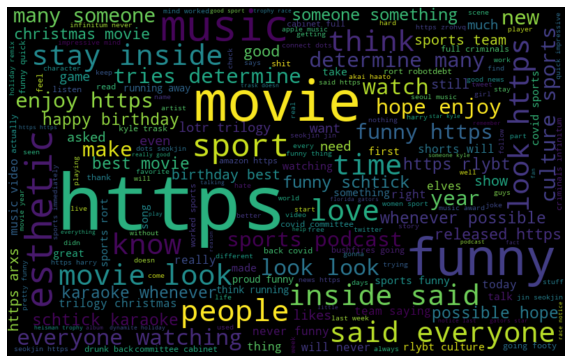

In [120]:
import matplotlib.pyplot as plt 
import seaborn as sns
all_words = ' '.join([text for text in df_final['cleaned_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [121]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [122]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df_final['cleaned_tweet'])

In [124]:
print(tfidf)

  (0, 581)	0.225822642652708
  (0, 263)	0.22276187760661326
  (0, 706)	0.21907644618883795
  (0, 271)	0.20339418576490884
  (0, 978)	0.1669919639156106
  (0, 663)	0.22086794898173112
  (0, 598)	0.225822642652708
  (0, 253)	0.225822642652708
  (0, 152)	0.21655867365728923
  (0, 491)	0.22477065809783384
  (0, 204)	0.21421877961578295
  (0, 597)	0.22375104748814728
  (0, 707)	0.225822642652708
  (0, 596)	0.21907644618883795
  (0, 490)	0.2028553977918767
  (0, 258)	0.22180138339131178
  (0, 400)	0.22180138339131178
  (0, 516)	0.18906603528343502
  (0, 476)	0.2199600913625085
  (0, 489)	0.225822642652708
  (0, 138)	0.22375104748814728
  (0, 262)	0.11942358555031116
  (1, 581)	0.225822642652708
  (1, 263)	0.22276187760661326
  (1, 706)	0.21907644618883795
  :	:
  (10393, 836)	0.24380527838960353
  (10393, 69)	0.1465467683788083
  (10393, 317)	0.19364056313818703
  (10393, 868)	0.14981200449009532
  (10393, 812)	0.08704570569356669
  (10393, 415)	0.05597457100084626
  (10393, 866)	0.357518343